In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm


In [6]:
# Why did I create this? 
# I created this script due to boredam and lack of motivation to study for my stats final. 

# inputs
numValues = 70 # size of the samples in the distribution
maxValue = 80 #seems to be where the highest point of the curve is centered - mean?
runs = 10000 #simulation runs
skewness = 500 # Negative values are left skewed, positive values are right skewed.
uncle_max = []
mu = 75 # average for all non-final grades as a %
sigma = 15 # sd for all non-final grades as a %
non_final_weight = .55 # weighting for all non-final related work
final_weight = .45 # weighting for the final exam


In [7]:
#simulated runs of the distribution of the class distribution
for i in range(10000):      
    random = skewnorm.rvs(a = skewness, loc = maxValue, size = numValues)  #Skewnorm function
    class_non_final = np.random.normal(mu, sigma, numValues)
    class_final_grade = final_weight * random + non_final_weight * class_non_final
    uncle_max.append(class_final_grade)






[[76.78879027 75.91117897 90.57429046 ... 77.06714628 86.18684123
  66.68210418]
 [73.99215333 85.26329066 77.23749638 ... 74.63342321 76.02022743
  74.33341037]
 [76.18152012 74.00048588 81.29307091 ... 82.40850731 93.0587308
  69.8772895 ]
 ...
 [79.75148082 76.12506601 78.75203231 ... 90.94161344 76.92291834
  55.65896473]
 [67.13783836 81.84659071 69.333383   ... 82.38767835 87.18728488
  72.96603554]
 [87.62045252 86.42744991 71.88942932 ... 81.13532532 86.99536502
  72.28598064]]
Enter your estimated non-final grade as a %:75
Enter your estimated final grade:75
You Pass!!!!


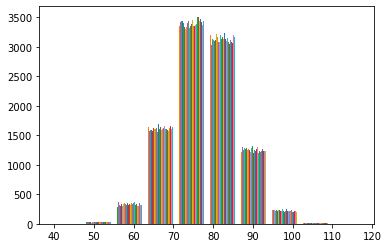

In [8]:
uncle_max_array = np.asarray(uncle_max)
uncle_max_array_2 = np.concatenate(uncle_max)    

#delete values over 100
indexArr = np.argwhere(uncle_max_array > 100)
uncle_max_array_2 = np.delete(uncle_max_array, indexArr)
print(uncle_max_array)

#failure cutoff at 2% quantile 
quantile = np.quantile(uncle_max_array_2, 0.005)

user_non_final = int(input("Enter your estimated non-final grade as a %:"))
user_final = int(input("Enter your estimated final grade:"))

if final_weight * user_final + non_final_weight * user_non_final > quantile:
    print("You Pass!!!!")
else:
    print("You Fail! HAHAHAHAHAHA")

plt.hist(uncle_max_array)
plt.show()